In [4]:
%pip install pandas seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Gràfiques amb Seaborn i Pandas

## Importacó de llibreries

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

## Configuració de l'entorn

In [6]:
# Configurar visualitzacions inline
%matplotlib inline

# Configurar opcions de display de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Configurar estil de seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

## Estructura del proyecte

In [7]:
# Directori base del projecte
BASE_DIR = os.path.dirname(os.path.abspath('main.ipynb'))
DATA_DIR = os.path.join(BASE_DIR, 'data')

# Crear directoris si no existeixen
os.makedirs(DATA_DIR, exist_ok=True)

print(f"Directori base: {BASE_DIR}")
print(f"Directori de dades: {DATA_DIR}")

Directori base: /home/super/Documents/2n/IA/Pandas/Seaborn/Seaborn_pandas
Directori de dades: /home/super/Documents/2n/IA/Pandas/Seaborn/Seaborn_pandas/data


## Funcions

In [8]:
def obrir_fitxer(nom_carpeta: str, fitxer: str):
    """Funció per buscar fitxer i transformar-lo en DataFrame

    Args:
        nom_carpeta (str): carpeta on es troba el fitxer
        fitxer (str): fitxer csv que volem transformar

    Returns:
        DataFrame excepció en cas d'error
    """
    if not nom_carpeta:
        FITXER = os.path.join(BASE_DIR, fitxer)
    else:
        FITXER = os.path.join(BASE_DIR, nom_carpeta, fitxer)
    
    if not os.path.isfile(FITXER):
        raise FileNotFoundError(f"El fitxer {FITXER} no existeix")
    
    dataframe = pd.read_csv(FITXER, encoding="utf-8")
    return dataframe

## Cárrega de dades 

In [9]:
try:
    df = obrir_fitxer("data", "titanic.csv")
    print(f"Dades carregades correctament.")
    print(f"Dimensions: {df.shape[0]} files, {df.shape[1]} columnes")
except FileNotFoundError as e:
    print(f"✗ Error: {e}")

Dades carregades correctament.
Dimensions: 887 files, 8 columnes


## 1. Fes una distribució per edats dels pasatgers. Utilitza un gràfic histplot i canvieu els colors de la gràfica més els labels dels eixos x, y.

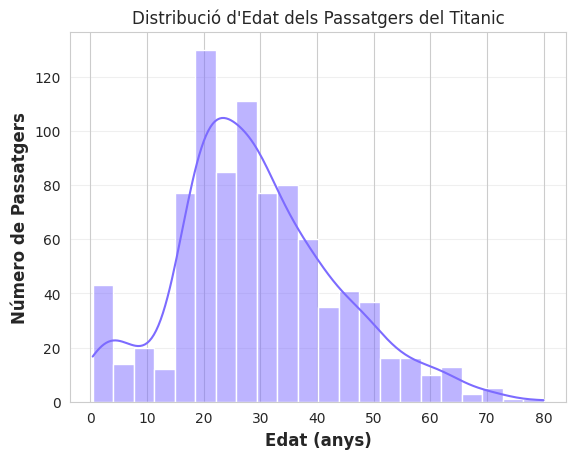

In [ ]:
# 1. Distribució per edats dels pasatgers
#? Creem un hitograma amb les edats, una corba de densitat (kde) i un color personalitzat
sns.histplot(data=df, x='Age', kde=True, color="#7C6BFF") 

#? Personalitzem les etiquetes dels eixos i el títol
plt.xlabel('Edat (anys)', fontsize=12, fontweight='bold') 
plt.ylabel('Número de Passatgers', fontsize=12, fontweight='bold')
plt.title('Distribució d\'Edat dels Passatgers del Titanic')
#? Afegim una graella només a l'eix y per millorar la llegibilitat
plt.grid(axis='y', alpha=0.3) 